### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации. 

SVM с каким ядром дал лучший результат?

In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_3580\2579280237.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


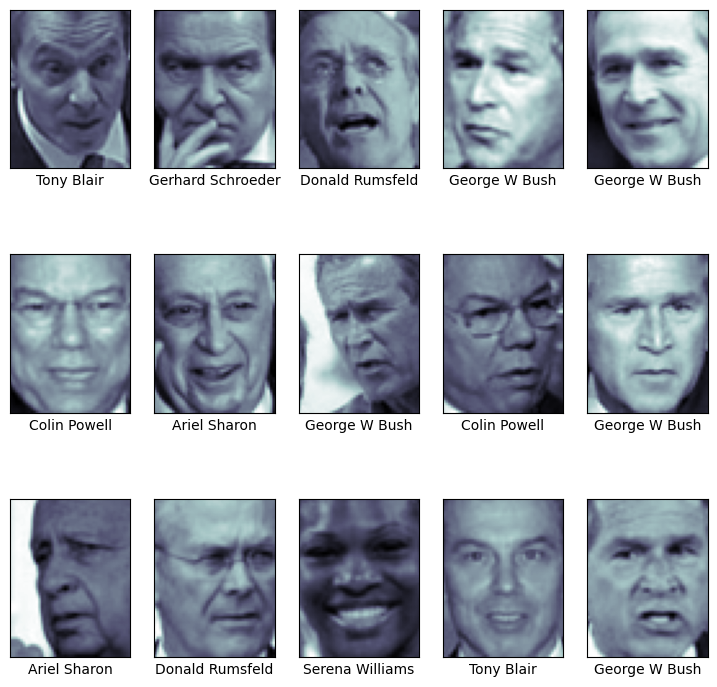

In [17]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [18]:
faces.images.shape

(1560, 62, 47)

In [19]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

In [50]:
svc_poly = SVC(kernel='poly', degree=1)

model = make_pipeline(pca, svc_poly)

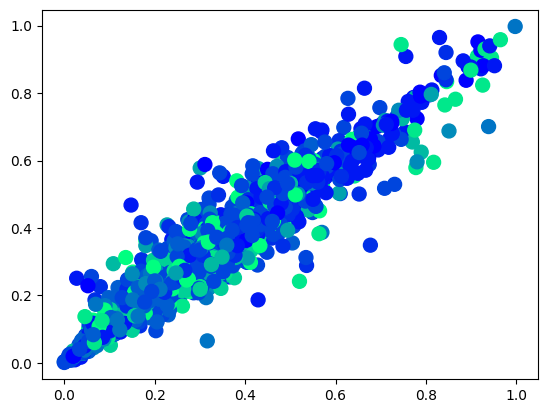

In [66]:
plt.scatter(faces.data[:, 0], faces.data[:, 1], s=100, c=faces.target, cmap="winter")
plt.show() #я не уверена, что нарисовала то, что нужно, но если график правильный, то это вообще не разделимо...

In [47]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=37)

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50, 60, 70]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 23.2 s
Wall time: 7.33 s
{'svc__C': 5}


In [52]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

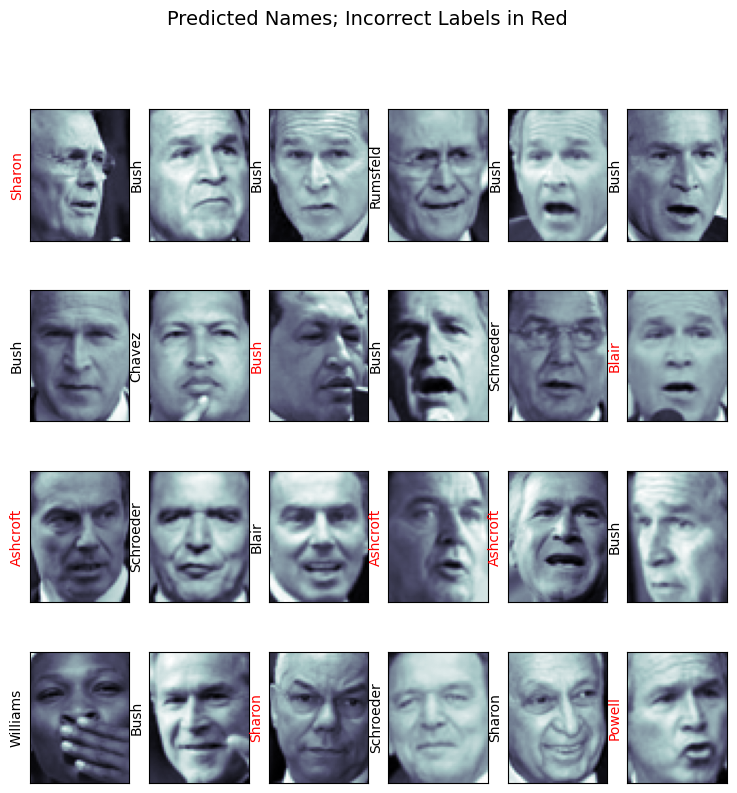

In [53]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.58      0.54        12
     Colin Powell       0.71      0.73      0.72        55
  Donald Rumsfeld       0.58      0.62      0.60        34
    George W Bush       0.80      0.85      0.83       131
Gerhard Schroeder       0.76      0.71      0.73        31
      Hugo Chavez       0.71      0.86      0.77        14
   Jacques Chirac       0.78      0.44      0.56        16
    Jean Chretien       0.60      0.50      0.55        12
    John Ashcroft       0.54      0.50      0.52        14
Junichiro Koizumi       0.93      0.76      0.84        17
  Serena Williams       1.00      0.50      0.67        10
       Tony Blair       0.74      0.80      0.77        44

         accuracy                           0.74       390
        macro avg       0.72      0.65      0.67       390
     weighted avg       0.74      0.74      0.73       390



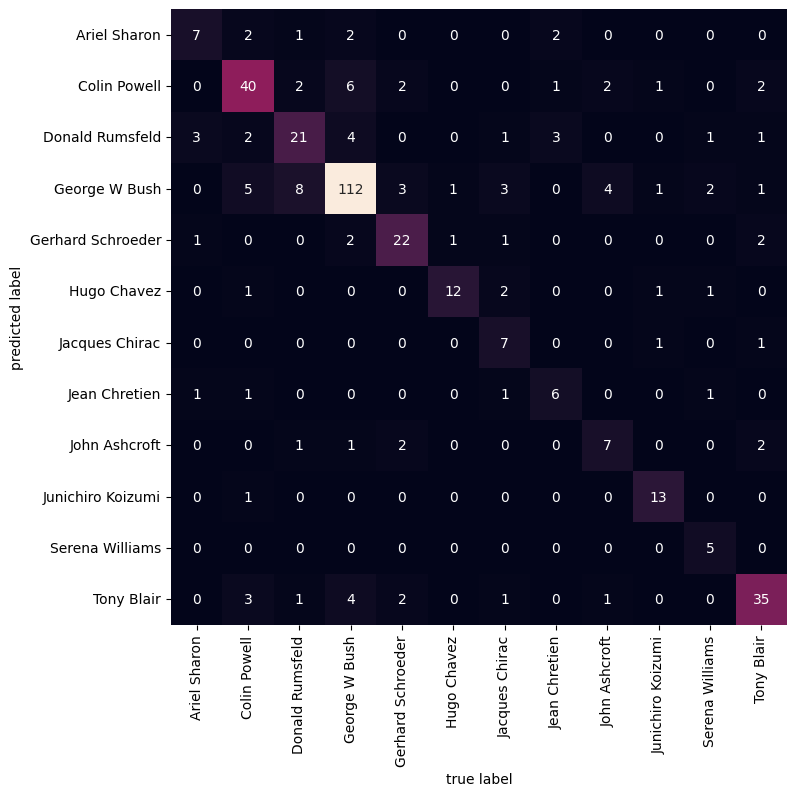

In [55]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.735897435897436

In [57]:
svc_poly = SVC(kernel='poly', degree=2)

model = make_pipeline(pca, svc_poly)

In [60]:

param_grid = {'svc__C': [1, 5, 10, 50, 60, 70]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 26.9 s
Wall time: 9.17 s
{'svc__C': 50}


In [61]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

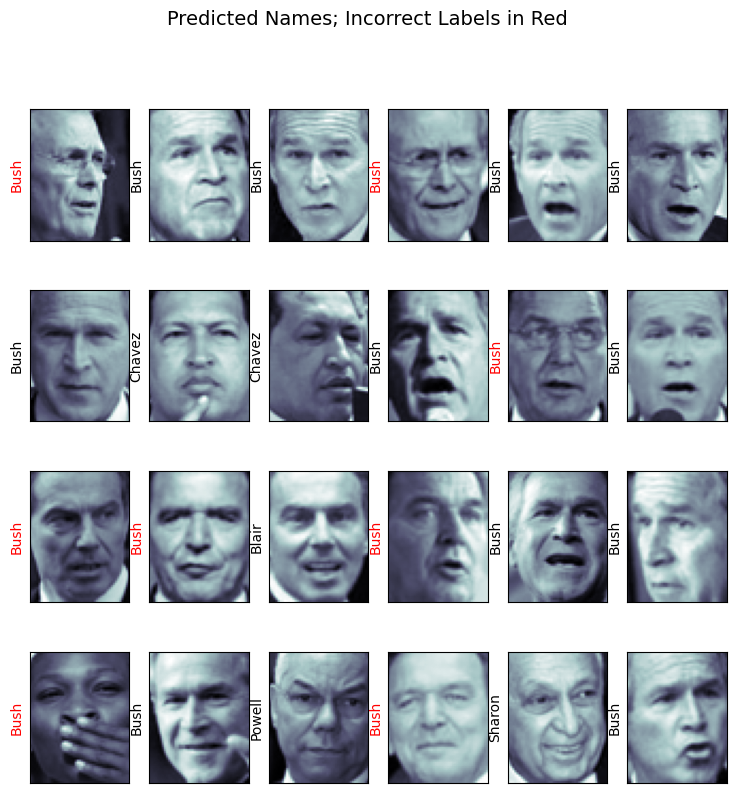

In [62]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [63]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.33      0.50        12
     Colin Powell       0.88      0.69      0.78        55
  Donald Rumsfeld       1.00      0.21      0.34        34
    George W Bush       0.48      0.98      0.64       131
Gerhard Schroeder       0.91      0.32      0.48        31
      Hugo Chavez       1.00      0.50      0.67        14
   Jacques Chirac       1.00      0.12      0.22        16
    Jean Chretien       0.57      0.33      0.42        12
    John Ashcroft       0.60      0.21      0.32        14
Junichiro Koizumi       1.00      0.47      0.64        17
  Serena Williams       1.00      0.20      0.33        10
       Tony Blair       0.92      0.50      0.65        44

         accuracy                           0.61       390
        macro avg       0.86      0.41      0.50       390
     weighted avg       0.76      0.61      0.58       390



В целом у полиномиального (оно же так называется?) ядра результат похуже, чем у линейного. Я пыталась менять у него степень (здесь оставила 1 и 2, но пробовала еще 4), лучшие метрики получились на 1. Интересно, что если степень увеличивать, то буквально со степени 2 модель начинает всех подряд называть Бушем (на ядре степенью 1 еще путает с разными людьми), причем чем выше степень, тем больше Бушей (на степени 4 их уже процентов 70), в результате точность у большинства людей высокая, а полнота низкая (кроме Буша, у него все не как у людей).

In [93]:
svc = SVC(kernel='rbf', gamma=1.0)

model = make_pipeline(pca, svc)

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 18.1 s
Wall time: 6.71 s
{'svc__C': 1}


In [90]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

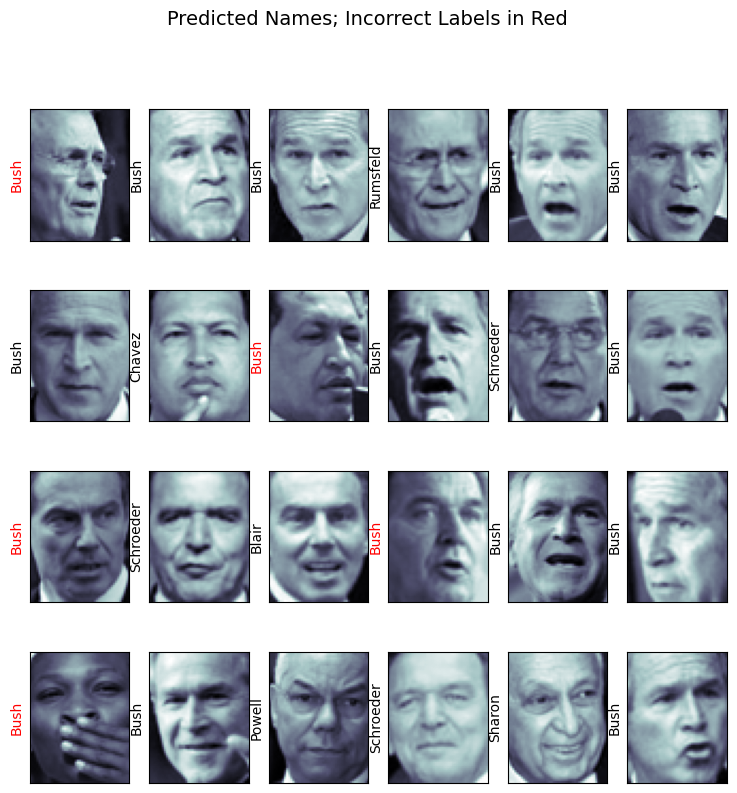

In [95]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [97]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.58      0.67        12
     Colin Powell       0.77      0.85      0.81        55
  Donald Rumsfeld       0.96      0.68      0.79        34
    George W Bush       0.65      0.98      0.78       131
Gerhard Schroeder       1.00      0.74      0.85        31
      Hugo Chavez       0.92      0.79      0.85        14
   Jacques Chirac       1.00      0.12      0.22        16
    Jean Chretien       1.00      0.50      0.67        12
    John Ashcroft       0.89      0.57      0.70        14
Junichiro Koizumi       1.00      0.53      0.69        17
  Serena Williams       1.00      0.20      0.33        10
       Tony Blair       0.94      0.77      0.85        44

         accuracy                           0.77       390
        macro avg       0.91      0.61      0.68       390
     weighted avg       0.83      0.77      0.75       390



У rbf оптимальным вариантом для gamma оказалось 1 (пробовала и больше и меньше, каждый раз качество ухудщалось, на 0.5 и 1.5 примерно одинаково плохо). Здесь примерно та же история: все ошибки заключаются в том, что алгоритм называет разных людей Бушем.


In [132]:
svc = SVC(kernel='sigmoid')

model = make_pipeline(pca, svc)

In [133]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: total: 16.3 s
Wall time: 5.08 s
{'svc__C': 1}


In [134]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

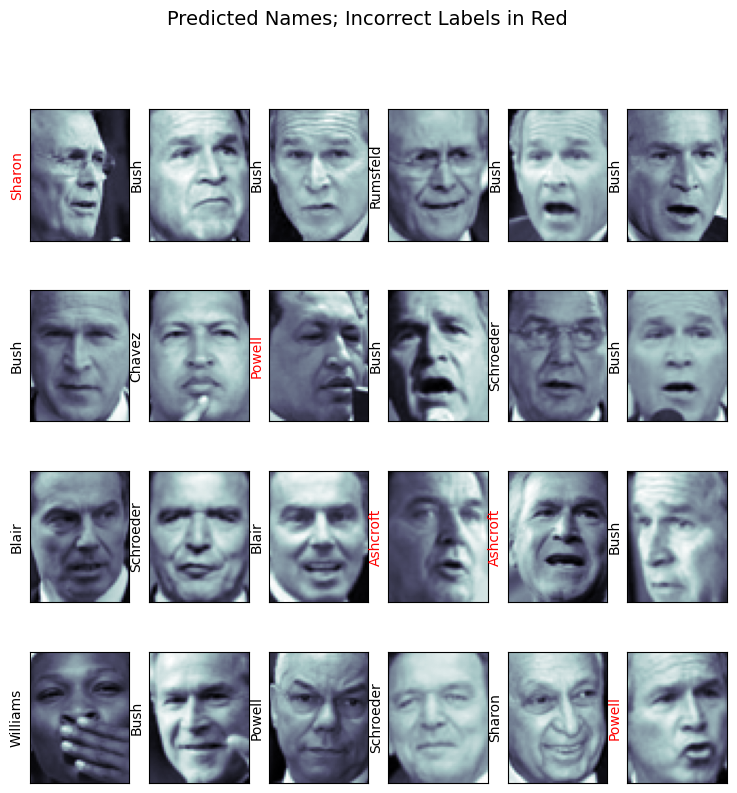

In [135]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [136]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.64      0.58      0.61        12
     Colin Powell       0.66      0.71      0.68        55
  Donald Rumsfeld       0.74      0.50      0.60        34
    George W Bush       0.66      0.94      0.78       131
Gerhard Schroeder       0.88      0.71      0.79        31
      Hugo Chavez       0.91      0.71      0.80        14
   Jacques Chirac       0.60      0.19      0.29        16
    Jean Chretien       0.71      0.42      0.53        12
    John Ashcroft       0.67      0.43      0.52        14
Junichiro Koizumi       0.91      0.59      0.71        17
  Serena Williams       1.00      0.40      0.57        10
       Tony Blair       0.85      0.77      0.81        44

         accuracy                           0.72       390
        macro avg       0.77      0.58      0.64       390
     weighted avg       0.73      0.72      0.70       390



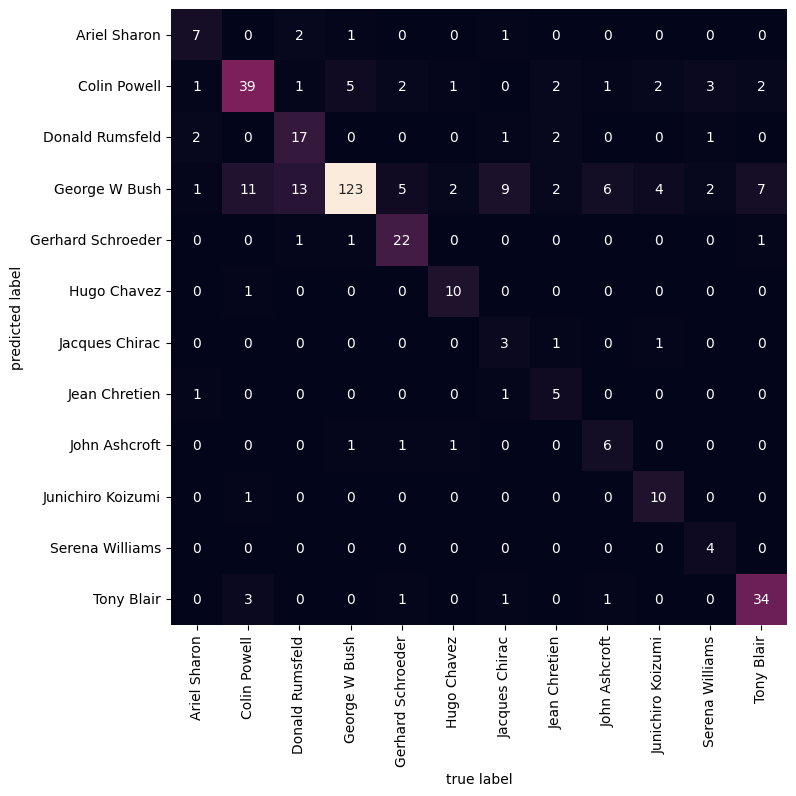

In [137]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Сигмоидной ядро лучше всего работает, если оставить гамму по умолчанию (в теории это 1.0, но когда я пыталась вручную подставить 1, то результат был сильно ниже). При уменьшении или уменьшении гаммы результат заметно ухудшается (accuracy между 0.3 и 0.4). В отличие от двух предыдущих ядер путает людей не только с Бушем, но и с другими.

Accuracy:
linear 0.78 (делали на семинаре)
rbf 0.77
poly (degree 1) 0.74
sigmoid 0.72

У линейного ядра лучший результат.
Если я правильно понимаю, то на ситуацию с Бушем (когда модель всех путает только с ним) влияет то, что его фотографий в датасете было больше всего.

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [208]:
from sklearn.linear_model import LogisticRegression

pca = PCA(svd_solver='randomized', whiten=True, random_state=42) #n_components добавила в grid search
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
model = make_pipeline(pca, lr)



In [178]:
param_grid = {
    "pca__n_components" : [140, 150, 160],
    "logisticregression__C" : np.logspace(-4, -3, 3, 4),
} 
grid = GridSearchCV(model, param_grid=param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)



{'logisticregression__C': 0.001, 'pca__n_components': 150}


In [179]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

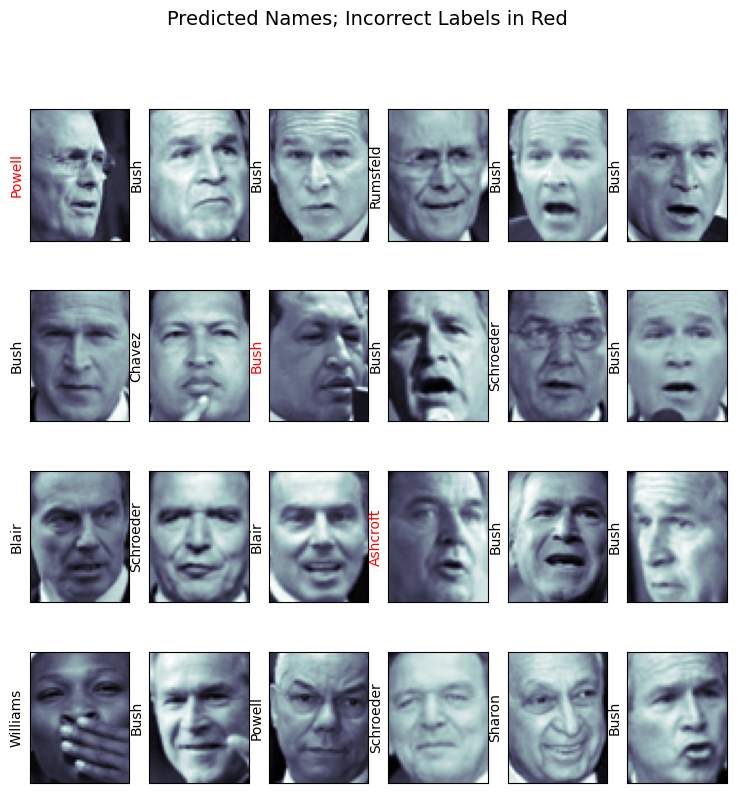

In [180]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [181]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.50      0.60        12
     Colin Powell       0.62      0.82      0.71        55
  Donald Rumsfeld       0.70      0.56      0.62        34
    George W Bush       0.73      0.95      0.82       131
Gerhard Schroeder       0.88      0.74      0.81        31
      Hugo Chavez       0.82      0.64      0.72        14
   Jacques Chirac       0.67      0.12      0.21        16
    Jean Chretien       0.56      0.42      0.48        12
    John Ashcroft       0.78      0.50      0.61        14
Junichiro Koizumi       0.73      0.47      0.57        17
  Serena Williams       1.00      0.30      0.46        10
       Tony Blair       0.85      0.80      0.82        44

         accuracy                           0.73       390
        macro avg       0.76      0.57      0.62       390
     weighted avg       0.74      0.73      0.71       390



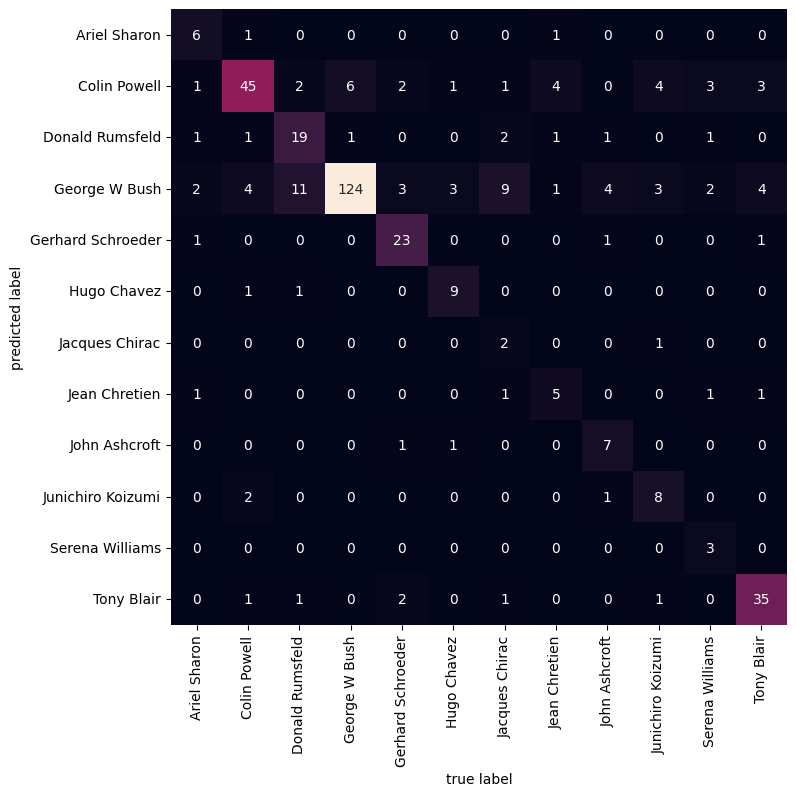

In [182]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [190]:
param_grid = {
    "pca__n_components" : [140, 150, 160],
    "logisticregression__penalty" : [None, "l1", "l2"], #почему-то каждый раз, когда я пыталась добавить регуляризацию в grid search, появлялось вот это полотно с "FitFailedWarning: 45 fits failed out of a total of 135."
    "logisticregression__C" : np.logspace(-4, -3, 3, ),
} 
grid = GridSearchCV(model, param_grid=param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)


c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python311\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_esti

{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'pca__n_components': 150}


In [191]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [192]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

#насколько я понимаю, регуляризация здесь все-таки добавилась (l2), но на результат не повлияла совсем, цифры те же самые, поэтому картинки не стала выводить

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.50      0.60        12
     Colin Powell       0.62      0.82      0.71        55
  Donald Rumsfeld       0.70      0.56      0.62        34
    George W Bush       0.73      0.95      0.82       131
Gerhard Schroeder       0.88      0.74      0.81        31
      Hugo Chavez       0.82      0.64      0.72        14
   Jacques Chirac       0.67      0.12      0.21        16
    Jean Chretien       0.56      0.42      0.48        12
    John Ashcroft       0.78      0.50      0.61        14
Junichiro Koizumi       0.73      0.47      0.57        17
  Serena Williams       1.00      0.30      0.46        10
       Tony Blair       0.85      0.80      0.82        44

         accuracy                           0.73       390
        macro avg       0.76      0.57      0.62       390
     weighted avg       0.74      0.73      0.71       390



In [209]:
param_grid = {
    "pca__n_components" : [140, 150, 160],
    "logisticregression__C" : [0.001, 0.01, 0.1, 1, 10, 100], #здесь я просто попробовала в другом формате варианты для C задать, и неожиданно помогло
} 
grid = GridSearchCV(model, param_grid=param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)



{'logisticregression__C': 0.1, 'pca__n_components': 150}


In [210]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [211]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.67      0.62        12
     Colin Powell       0.78      0.78      0.78        55
  Donald Rumsfeld       0.68      0.79      0.73        34
    George W Bush       0.92      0.86      0.89       131
Gerhard Schroeder       0.78      0.81      0.79        31
      Hugo Chavez       0.67      0.86      0.75        14
   Jacques Chirac       0.71      0.62      0.67        16
    Jean Chretien       0.46      0.50      0.48        12
    John Ashcroft       0.53      0.57      0.55        14
Junichiro Koizumi       0.87      0.76      0.81        17
  Serena Williams       1.00      0.60      0.75        10
       Tony Blair       0.82      0.84      0.83        44

         accuracy                           0.79       390
        macro avg       0.73      0.72      0.72       390
     weighted avg       0.80      0.79      0.79       390



In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)
#на 0.1 больше, чем у svc с линейным ядром, лучший результат получился (без balanced weights было 0.782, я добавила их позже)

0.7897435897435897

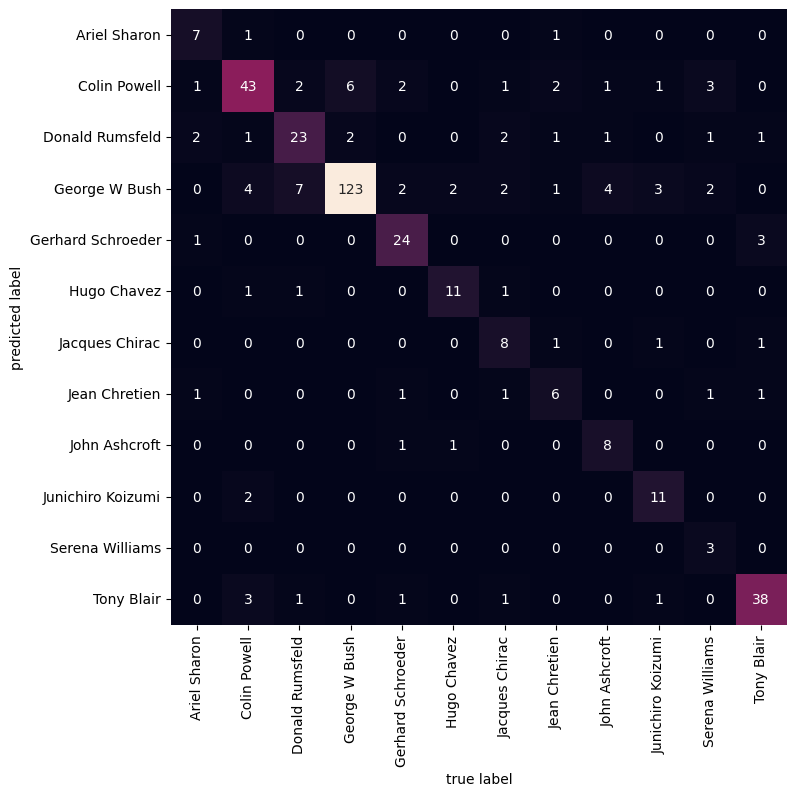

In [197]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них. 

In [2]:
import pandas as pd

data = pd.read_csv(r'D:\\datasets\\winequalityN.csv')
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

fixed acidity       0.153917
pH                  0.138525
volatile acidity    0.123134
sulphates           0.061567
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
dtype: float64 %


In [6]:
set(data.quality)

{3, 4, 5, 6, 7, 8, 9}

In [4]:
data.type = data.type.apply(lambda x: 1 if x == 'red' else 0)

In [5]:
data.columns = [column.replace(" ", "_") for column in data.columns] 

In [6]:
data['fixed_acidity'] = data['fixed_acidity'].fillna((data['fixed_acidity'].mean()))
data['pH'] = data['pH'].fillna((data['pH'].mean()))
data['volatile_acidity'] = data['volatile_acidity'].fillna((data['volatile_acidity'].mean()))
data['sulphates'] = data['sulphates'].fillna((data['sulphates'].mean()))
data['citric_acid'] = data['citric_acid'].fillna((data['citric_acid'].mean()))
data['residual_sugar'] = data['residual_sugar'].fillna((data['residual_sugar'].mean()))
data['chlorides'] = data['chlorides'].fillna((data['chlorides'].mean()))

<Axes: >

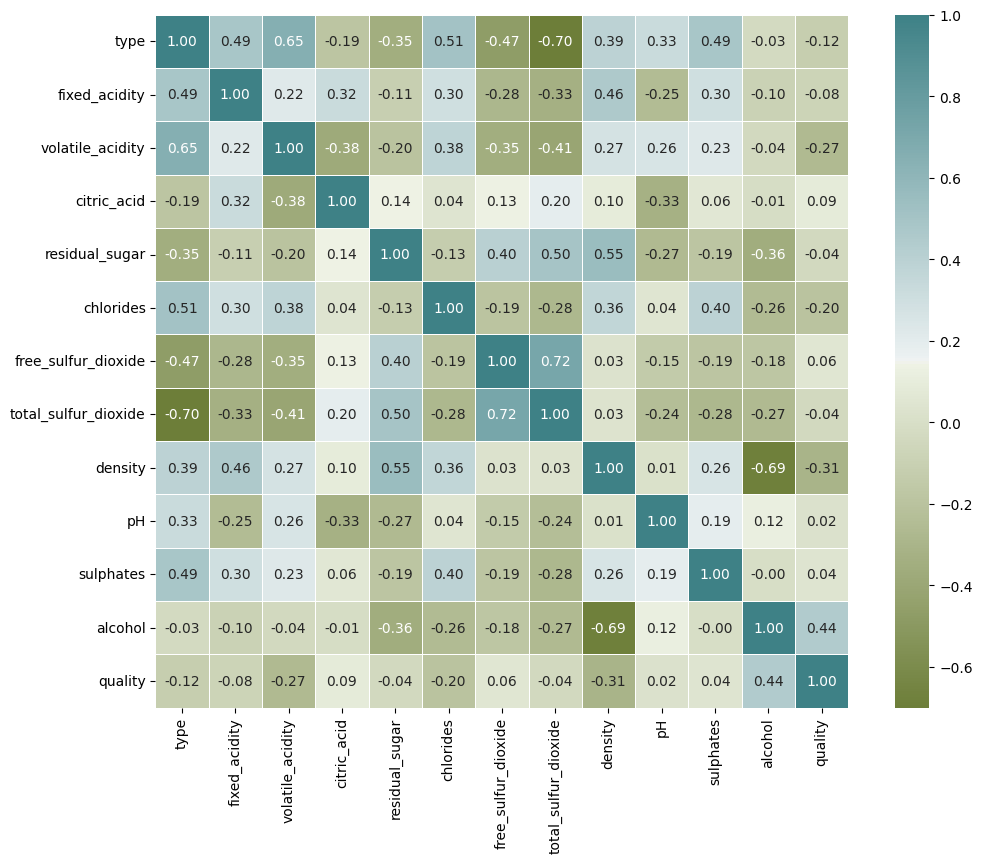

In [9]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [111]:
data.drop(['total_sulfur_dioxide', 'pH', 'residual_sugar'], axis=1, inplace=True) 
#попробовала удалить признаки уже после того, как посмотрела результаты всех моделей. На дереве удаление ничего не дало, поэтому другие не стала перезапускать, grid search очень долго думает.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [35]:
X = data.drop('quality', axis=1)
y = data.quality
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y) #stratify поднял accuracy с 0.53 до 0.56

In [37]:
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(solver='liblinear'))]) #с balanced weights результат был хуже примерно на 0.1
param_grid = {"logreg__C" : [0.001, 0.01, 0.1, 1, 10, 100]
} 
grid = GridSearchCV(pipe, param_grid=param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)


c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'logreg__C': 10}


In [31]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [32]:
from sklearn.metrics import classification_report
target_names = ['class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9'] #я запуталась и не сообразила, откуда это можно достать, поэтому ввела вручную
print(classification_report(ytest, yfit, target_names=target_names))

              precision    recall  f1-score   support

     class 3       1.00      0.12      0.22         8
     class 4       1.00      0.02      0.04        54
     class 5       0.59      0.63      0.61       535
     class 6       0.53      0.74      0.62       709
     class 7       0.65      0.16      0.26       270
     class 8       0.00      0.00      0.00        48
     class 9       0.00      0.00      0.00         1

    accuracy                           0.56      1625
   macro avg       0.54      0.24      0.25      1625
weighted avg       0.57      0.56      0.52      1625



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(72.72222222222221, 0.5, 'predicted label')

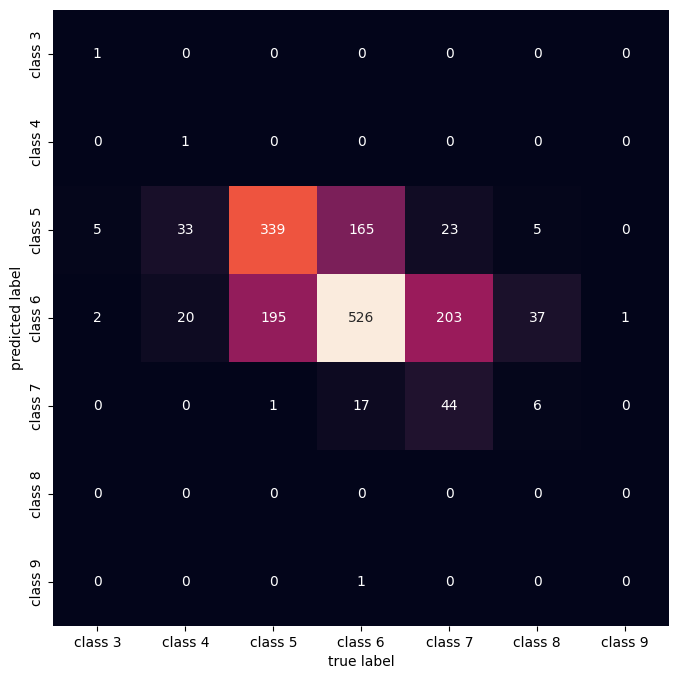

In [33]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

2 класса не предсказываются правильно вообще. Больше всего правильных попаданий в трех самых многочисленных классах (5, 6, 7), но они и между собой часто путаются. Balanced class weights не помог.

In [22]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear'))])

In [24]:
param_grid = {'svc__C': [1, 2, 3, 4, 5]}
grid = GridSearchCV(pipe2, param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'svc__C': 3}


In [25]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

Text(72.72222222222221, 0.5, 'predicted label')

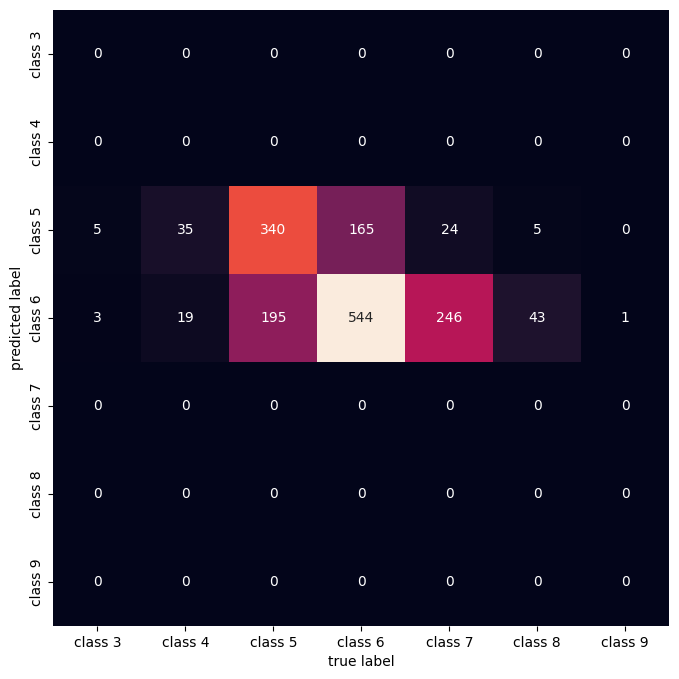

In [28]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
print(classification_report(ytest, yfit, target_names=target_names))

              precision    recall  f1-score   support

     class 3       0.00      0.00      0.00         8
     class 4       0.00      0.00      0.00        54
     class 5       0.59      0.64      0.61       535
     class 6       0.52      0.77      0.62       709
     class 7       0.00      0.00      0.00       270
     class 8       0.00      0.00      0.00        48
     class 9       0.00      0.00      0.00         1

    accuracy                           0.54      1625
   macro avg       0.16      0.20      0.18      1625
weighted avg       0.42      0.54      0.47      1625



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:


pipe3 = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', gamma=0.5))]) #брала gamma 1, 0.7, 0.5, вроде бы ничего не менялось

In [53]:
param_grid = {'svc__C': [1, 2, 3, 4, 5]}
grid = GridSearchCV(pipe3, param_grid)

grid.fit(Xtrain, ytrain)

print(grid.best_params_)

{'svc__C': 5}


In [54]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

In [55]:
print(classification_report(ytest, yfit)) #почему-то вообще пропал 1 класс (самый малочисленный)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.46      0.23      0.30        53
           5       0.63      0.69      0.66       498
           6       0.63      0.67      0.65       725
           7       0.60      0.52      0.56       286
           8       0.62      0.34      0.44        58

    accuracy                           0.63      1625
   macro avg       0.49      0.41      0.44      1625
weighted avg       0.62      0.63      0.62      1625



c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Здесь все еще хуже. Модель правильно предсказывает только 2 класса из 7 и то только иногда.
Взяла 2 ядра, на которых были лучшие результаты в предыдущей задаче. На rbf accuracy стала немного выше, но вообще исчез один из классов.

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mlxtend.plotting import plot_decision_regions

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [119]:

dt = DecisionTreeClassifier(random_state=13) #ограничение глубины и количества листьев снижали результат, а 0.62 вроде бы не похоже на переобучение
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_dt, y_test)}")


Linear model accuracy: 0.6215384615384615


In [120]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.26      0.26      0.26        54
           5       0.69      0.64      0.66       544
           6       0.66      0.67      0.67       713
           7       0.54      0.58      0.56       265
           8       0.41      0.49      0.45        43
           9       0.00      0.00      0.00         2

    accuracy                           0.62      1625
   macro avg       0.37      0.38      0.37      1625
weighted avg       0.63      0.62      0.62      1625



Text(72.72222222222221, 0.5, 'predicted label')

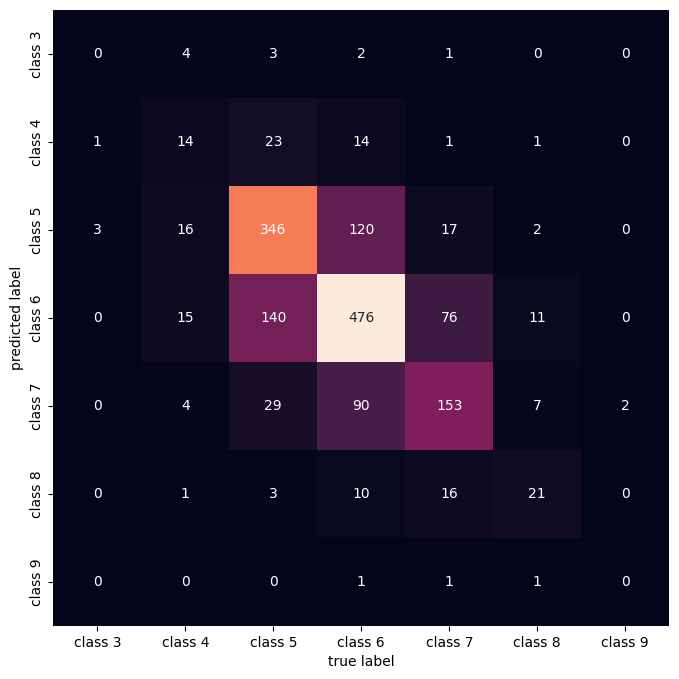

In [121]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

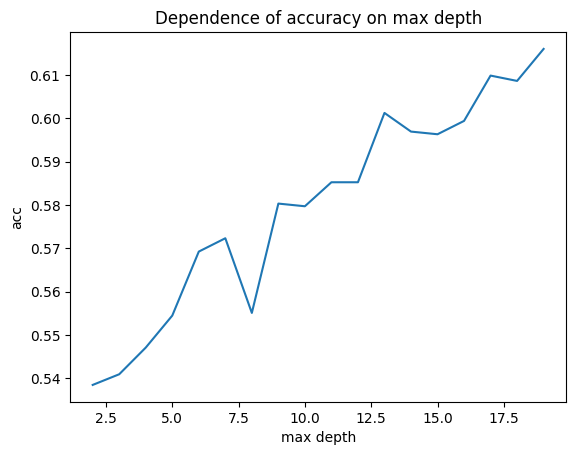

In [114]:
max_depth_array = range(2, 20)
accuracy = []

for max_depth in max_depth_array:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, dt.predict(X_test)))

plt.plot(max_depth_array, accuracy)
plt.title("Dependence of accuracy on max depth")
plt.xlabel("max depth")
plt.ylabel("acc")
plt.show()

In [115]:
pd.DataFrame({
    "max_depth": max_depth_array,
    "Accuracy": accuracy
}).sort_values(by="Accuracy").reset_index(drop=True) 

max_depth  Accuracy
0           2  0.538462
1           3  0.540923
2           4  0.547077
3           5  0.554462
4           8  0.555077
5           6  0.569231
6           7  0.572308
7          10  0.579692
8           9  0.580308
9          11  0.585231
10         12  0.585231
11         15  0.596308
12         14  0.596923
13         16  0.599385
14         13  0.601231
15         18  0.608615
16         17  0.609846
17         19  0.616000

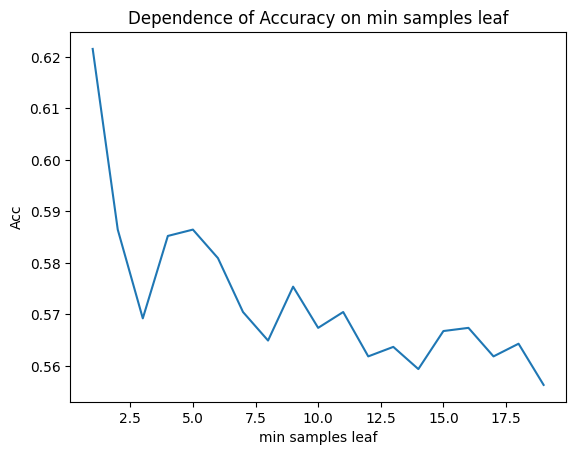

In [116]:
min_samples_leaf_array = range(1, 20)
acc = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, dt.predict(X_test)))
    
plt.plot(min_samples_leaf_array, acc)
plt.title("Dependence of Accuracy on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("Acc")
plt.show()

In [107]:
pd.DataFrame({
    "min samples leaf": min_samples_leaf_array,
    "Accuracy": acc
}).sort_values(by="Accuracy").reset_index(drop=True)

min samples leaf  Accuracy
0                 19  0.556308
1                 14  0.559385
2                 17  0.561846
3                 12  0.561846
4                 13  0.563692
5                 18  0.564308
6                  8  0.564923
7                 15  0.566769
8                 16  0.567385
9                 10  0.567385
10                 3  0.569231
11                11  0.570462
12                 7  0.570462
13                 9  0.575385
14                 6  0.580923
15                 4  0.585231
16                 5  0.586462
17                 2  0.586462
18                 1  0.621538

Дерево 2 самых малочисленных класса не определило вообще. 
Дополнительные ограничения (на глубину, листья) применять не стала, так как они должны были снизить accuracy, а она и так была низкая.

Accuracy:
Logistic Regression 0.56
SVC linear 0.54
SVC rbf 0.63 (но потерян один класс)
Desicion Tree 0.62

SVC rbf справился лучше всех, в пропавший класс дерево тоже ничего не определило. Но в целом результаты низкие. Насколько я понимаю, могло сильно повлиять неравномерное распределение по классам, хотя в тех трех классах, для которых больше всего данных, модели тоже заметно ошибаются.
